# Challenge Wahrscheinlichkeitsmodellierung

# Aufgabenstellung

Die Kantonsstrasse unterhalb Schiers (GR) ist vom Steinschlag betroffen. Steine lösen sich von zwei unterschiedlichen Stellen an der Felswand ab (Ablösungszone 1 und Ablösungszone 2). Der betroffene Strassenabschnitt ist mit Steinfangnetzen gesichert, die jedoch in die Jahre gekommen sind und die angestrebte Sicherheit nicht mehr gewährleisten können. Die Planung für Ersatznetze hat bereits begonnen, kann aber frühstens in einem Jahr umgesetzt werden.

In den letzten Monaten haben sich mehrere Steinschlagereignisse ereignet. Kommt es im Lauf des nächsten Jahres zu weiteren vergleichbaren Ereignissen, könnten die alten Sicherheitsnetze versagen und die Verkehrsteilnehmer einem grossen Sicherheitsrisiko ausgesetzt sein. Die Bevölkerung ist verunsichert und der Kantonsingenieur muss schnell entscheiden, ob das Risiko für die Verkehrsteilnehmer zu gross ist und die Kantonsstrasse vorübergehend gesperrt werden muss. Der Kantonsingenieur hat sie beauftragt, anhand von vorhanden Daten die Wahrscheinlichkeit eines Todesfalls zu berechnen und eine Empfehlung bezüglich der Schliessung bzw Offenhaltung der Strasse auszusprechen.

Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.0001 ist. Für die Berechnungen soll ein gut strukturierter und dokumentierter Code in Python oder R entwickelt werden.


## Grundlagen

Für die Planung der neuen Sicherheitsnetze, hat ein beauftragter Geologe, über drei Monate Daten zu den Steinschlagereignisse aufgenommen. Dabei wurde Steingeschwindigkeit, Steinmasse und Zeitpunkt und der Zeitpunkt das Ereignis registriert. Diese Daten können von Ihnen zur Modellbildung verwendet werden und stehen unter folgenden Links zur Verfügung:

Ereignis aus Ablösungszone 1: https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=0

Ereignis aus Ablösungszone 2: https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=0

NB: Die Geschwindigkeit ist durch einen Radar aufgenommen und sehr präzise. Die Masse ist eine Experten-Schätzung des Geologen.

Ein beauftragtes Ingenieurbüro hat geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1000 kJ sicher sind. Falls bereits ein Stein mit über 2000 kg in den Sicherheitsnetzen liegt, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 500 kJ. Steine in den Sicherheitsnetzen werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

Das tägliche Verkehrsaufkommen beträgt 1200 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h

***

# Setup

In [112]:
#prepration of workspace
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime
import matplotlib.pyplot as plt


In [113]:
#import df
df_zone1 = pd.read_csv("https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=1")
df_zone2 = pd.read_csv("https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=1")

# Datenbereinigung
## Daten zu Ablösezone 1 bereinigen

In [114]:
#explore dataset
df_zone1.head(5)

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,2019-01-01,09:00,194.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,21:00,224.0,8.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,14:00,3104.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,15:00,228.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,23:00,755.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#rename columns
df_zone1 = df_zone1.rename(columns={"Datum": "date", "Uhrzeit": "time", "Masse [kg]": "mass [kg]", "Geschwindigkeit [m/s]": "vel [m/s]"})

In [116]:
#remove NaN values
df_zone1 = pd.DataFrame(df_zone1)
df_zone1.drop(df_zone1.iloc[:, 4:77],axis = 1, inplace = True )
df_zone1 = df_zone1.iloc[0:68]
display(df_zone1)

,date,time,mass [kg],vel [m/s]
0,2019-01-01,09:00,194.0,8.4
1,2019-01-01,21:00,224.0,8.8
2,2019-01-02,14:00,3104.0,9.2
3,2019-01-04,15:00,228.0,8.0
4,2019-01-05,23:00,755.0,7.0
...,...,...,...,...
63,2019-03-18,16:00,167.0,8.9
64,2019-03-22,18:00,2847.0,7.0
65,2019-03-26,00:00,44.0,8.9
66,2019-03-26,06:00,45.0,8.4


In [117]:
#check datatypes
df_zone1.dtypes

date          object
time          object
mass [kg]    float64
vel [m/s]    float64
dtype: object

In [118]:
#change datatype of column "date"

#connect column date and time but also keep time row for later use
df_zone1["time [h]"] = df_zone1["time"]

df_zone1["date"] = pd.to_datetime(df_zone1["date"] + " " + df_zone1["time"])

#rearrange columns
df_zone1 = df_zone1[["date", "time [h]", "mass [kg]", "vel [m/s]"]]

In [119]:
#check datatypes
df_zone1.dtypes

date         datetime64[ns]
time [h]             object
mass [kg]           float64
vel [m/s]           float64
dtype: object

In [120]:
#sort df by date
df_zone1.sort_values(by = "date", inplace = True)

In [121]:
display(df_zone1)

,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,194.0,8.4
1,2019-01-01 21:00:00,21:00,224.0,8.8
2,2019-01-02 14:00:00,14:00,3104.0,9.2
3,2019-01-04 15:00:00,15:00,228.0,8.0
4,2019-01-05 23:00:00,23:00,755.0,7.0
...,...,...,...,...
63,2019-03-18 16:00:00,16:00,167.0,8.9
64,2019-03-22 18:00:00,18:00,2847.0,7.0
65,2019-03-26 00:00:00,00:00,44.0,8.9
66,2019-03-26 06:00:00,06:00,45.0,8.4


## Daten zu Ablösezone 2 bereinigen

In [122]:
#explore dataset
df_zone2.head(5)

,Date,Uhrzeit,m [kg],v [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2019-01-01,09:00,38.0,45.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,06:00,187.0,41.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,10:00,36.0,44.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,14:00,6.0,41.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11,06:00,65.0,39.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#rename columns
df_zone2 = df_zone2.rename(columns={"Date": "date", "Uhrzeit": "time", "m [kg]": "mass [kg]", "v [m/s]": "vel [m/s]"})

In [124]:
#remove NaN values
df_zone2 = pd.DataFrame(df_zone2)
df_zone2.drop(df_zone2.iloc[:, 4:77],axis = 1, inplace = True )
df_zone2 = df_zone2.iloc[0:32]
display(df_zone2.head(5))

,date,time,mass [kg],vel [m/s]
0,2019-01-01,09:00,38.0,45.4
1,2019-01-03,06:00,187.0,41.6
2,2019-01-04,10:00,36.0,44.6
3,2019-01-07,14:00,6.0,41.2
4,2019-01-11,06:00,65.0,39.6


In [125]:
#check datatypes
df_zone2.dtypes

date          object
time          object
mass [kg]    float64
vel [m/s]    float64
dtype: object

In [126]:
#change datatype of column "date"

#connect column date and time but also keep time row for later use
df_zone2["time [h]"] = df_zone2["time"]
df_zone2["date"] = pd.to_datetime(df_zone2["date"] + " " + df_zone2["time"])

#rearrange columns
df_zone2 = df_zone2[["date", "time [h]", "mass [kg]", "vel [m/s]"]]


In [127]:
#check datatypes
df_zone2.dtypes

date         datetime64[ns]
time [h]             object
mass [kg]           float64
vel [m/s]           float64
dtype: object

In [128]:
#sort df by date
df_zone2.sort_values(by = "date", inplace = True)

In [129]:
display(df_zone2.head(5))

,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,38.0,45.4
1,2019-01-03 06:00:00,06:00,187.0,41.6
2,2019-01-04 10:00:00,10:00,36.0,44.6
3,2019-01-07 14:00:00,14:00,6.0,41.2
4,2019-01-11 06:00:00,06:00,65.0,39.6


## Bereinigen der Messfehler
In der bezeichneten Zone Zwei wurde bei der Datenerfassung vom 10. März 2019 eine Masse von 0.0 Kg dokumentiert. Da diese Eintragung unmöglich ist, impliziert sie einen Fehler innerhalb des Datensatzes.
Zur Korrektur dieses offenkundigen Fehlers stehen uns verschiedene Optionen zur Verfügung, einschließlich der Löschung des fehlerhaften Eintrags oder der Ersetzung durch einen geeigneten Ersatzwert, wie beispielsweise den Median aller vorhandenen Messwerte.
In Anbetracht der Größe unseres Datensatzes, der als relativ klein klassifiziert wird, erscheint eine Imputation als geeignete Lösung. Durch diesen Prozess werden fehlende oder fehlerhafte Daten durch plausible Werte ersetzt, wodurch die Stichprobengröße beibehalten und Verzerrungen minimiert werden können.

In [130]:
#determine median df_zone 2
median_zone2 = df_zone2["mass [kg]"].median()

#input value to df
df_zone2.loc[df_zone2["mass [kg]"] <= 0, "mass [kg]"] = median_zone2

#show data
display(df_zone2.head(5))

,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,38.0,45.4
1,2019-01-03 06:00:00,06:00,187.0,41.6
2,2019-01-04 10:00:00,10:00,36.0,44.6
3,2019-01-07 14:00:00,14:00,6.0,41.2
4,2019-01-11 06:00:00,06:00,65.0,39.6


In [131]:
#sort data by Date
df_zone1.sort_values(by = "date", ascending = True, inplace = True)
display(df_zone1.head(5))

df_zone2.sort_values(by = "date", ascending = True, inplace = True)
display(df_zone2.head(5))


,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,194.0,8.4
1,2019-01-01 21:00:00,21:00,224.0,8.8
2,2019-01-02 14:00:00,14:00,3104.0,9.2
3,2019-01-04 15:00:00,15:00,228.0,8.0
4,2019-01-05 23:00:00,23:00,755.0,7.0


,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,38.0,45.4
1,2019-01-03 06:00:00,06:00,187.0,41.6
2,2019-01-04 10:00:00,10:00,36.0,44.6
3,2019-01-07 14:00:00,14:00,6.0,41.2
4,2019-01-11 06:00:00,06:00,65.0,39.6


## Zeitdifferenz zwischen Ablösungen berechnen

In [132]:
#create column to assign running time difference in hours
#Zone 1
df_zone1["timediff [h]"] = 0
df_zone1["timediff [h]"] = (df_zone1["date"] -
                                       df_zone1["date"].shift(1)).astype("timedelta64[h]")

# replace first NaN with 0
df_zone1["timediff [h]"].fillna(0,inplace=True)

#rearrange columns
df_zone1 = df_zone1[["date", "time [h]", "timediff [h]", "mass [kg]", "vel [m/s]"]]

display(df_zone1.head(5))

#Zone 2
df_zone2["timediff [h]"] = 0
df_zone2["timediff [h]"] = (df_zone2["date"] -
                                       df_zone2["date"].shift(1)).astype("timedelta64[h]")

# replace first NaN with 0
df_zone2["timediff [h]"].fillna(0,inplace=True)

#rearrange columns
df_zone2 = df_zone2[["date", "time [h]", "timediff [h]", "mass [kg]", "vel [m/s]"]]

display(df_zone2.head(5))

,date,time [h],timediff [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,0.0,194.0,8.4
1,2019-01-01 21:00:00,21:00,12.0,224.0,8.8
2,2019-01-02 14:00:00,14:00,17.0,3104.0,9.2
3,2019-01-04 15:00:00,15:00,49.0,228.0,8.0
4,2019-01-05 23:00:00,23:00,32.0,755.0,7.0


,date,time [h],timediff [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,0.0,38.0,45.4
1,2019-01-03 06:00:00,06:00,45.0,187.0,41.6
2,2019-01-04 10:00:00,10:00,28.0,36.0,44.6
3,2019-01-07 14:00:00,14:00,76.0,6.0,41.2
4,2019-01-11 06:00:00,06:00,88.0,65.0,39.6


## Kinetische Energie Berechnen

Für spätere Analysen wird die kinetische Energie in benötigt.

In [133]:
#zone 1
df_zone1["KE [kJ]"] = 0.5 * df_zone1["mass [kg]"] * df_zone1["vel [m/s]"]**2 / 1000

#zone2
df_zone2["KE [kJ]"] = 0.5 * df_zone2["mass [kg]"] * df_zone2["vel [m/s]"]**2 / 1000


## Verbinden der beiden Datensätze

Für spätere Analysen werden die Datensätze df_zone1 und df_zone2 zu zusammengeführt.

In [134]:
#connect dfs
df_zoneall = pd.concat([df_zone1, df_zone2])

#sort data by Date
df_zoneall.sort_values(by = "date", ascending = True, inplace = True)

df_zoneall.head(5)


,date,time [h],timediff [h],mass [kg],vel [m/s],KE [kJ]
0,2019-01-01 09:00:00,09:00,0.0,194.0,8.4,6.84432
0,2019-01-01 09:00:00,09:00,0.0,38.0,45.4,39.16204
1,2019-01-01 21:00:00,21:00,12.0,224.0,8.8,8.67328
2,2019-01-02 14:00:00,14:00,17.0,3104.0,9.2,131.36128
1,2019-01-03 06:00:00,06:00,45.0,187.0,41.6,161.80736


# Analyse der Daten

In [135]:
#overview of dataframe df_zone1 and df_zone2
df_zone1.describe()


,timediff [h],mass [kg],vel [m/s],KE [kJ]
count,68.000000,68.000000,68.000000,68.000000
mean,30.102941,628.632353,8.788235,25.197761
std,27.789260,695.884703,1.989189,32.704933
min,0.000000,12.000000,3.600000,0.464640
25%,5.750000,214.750000,7.300000,8.214900
50%,22.000000,402.500000,8.800000,12.815133
75%,49.000000,773.000000,10.125000,23.135955
max,113.000000,3104.000000,14.100000,164.403200


In [136]:
df_zone2.describe()

,timediff [h],mass [kg],vel [m/s],KE [kJ]
count,32.000000,32.000000,32.000000,32.000000
mean,64.250000,101.062500,37.790625,72.543707
std,55.533193,102.785382,5.395778,87.452601
min,0.000000,3.000000,24.900000,2.683935
25%,27.750000,37.750000,33.200000,29.600176
50%,48.500000,58.000000,38.750000,39.581020
75%,77.250000,140.000000,41.725000,63.103560
max,212.000000,406.000000,46.500000,394.796430


## Boxplots

Im ersten Schritt der Datenanalyse erfolgt die Untersuchung der einzelnen Datensätze mittels Boxplots. Diese Methode ermöglicht eine detaillierte Visualisierung der Datenverteilung und fördert somit das Verständnis für ihre strukturellen Eigenschaften. Des Weiteren hilft sie dabei, potentielle Ausreißer zu identifizieren, die eine bedeutende Auswirkung auf nachfolgende statistische Analysen und Modellierungen haben könnten.

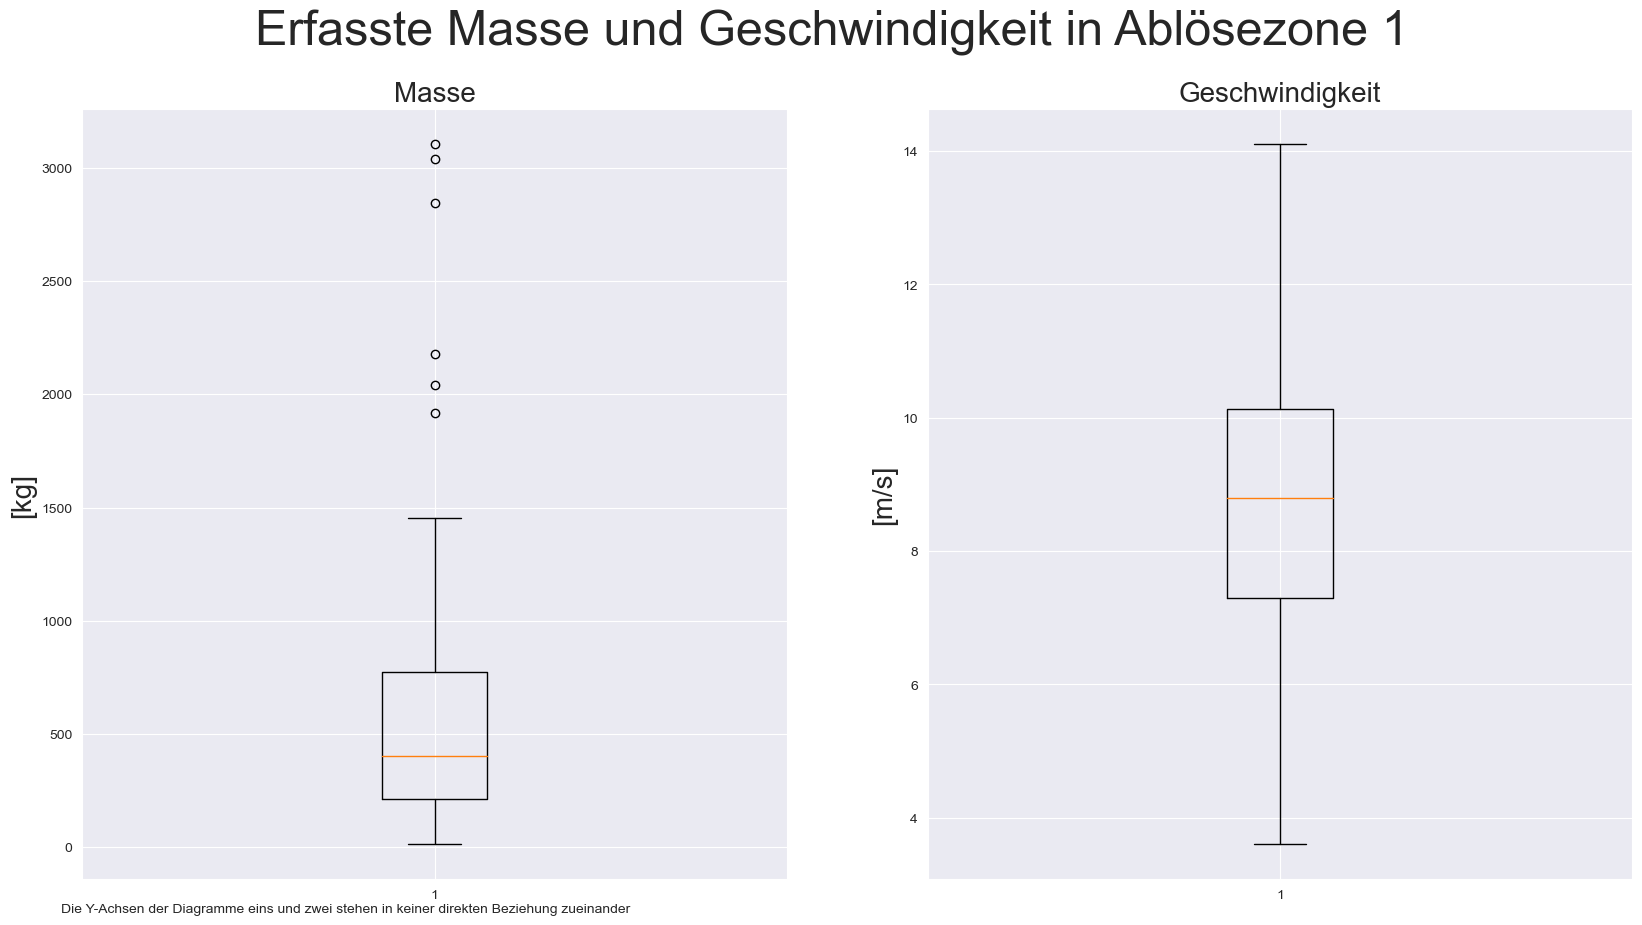

In [137]:
#boxplot of attributes "mass" and "velocity"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.boxplot(df_zone1["mass [kg]"])
ax1.set_xlabel("", fontsize = 20)
ax1.set_ylabel("[kg]", fontsize = 20)
ax1.set_title("Masse", fontsize = 20)

#subplot 1
ax2.boxplot(df_zone1["vel [m/s]"])
ax2.set_ylabel("[m/s]", fontsize = 20)
ax2.set_title("Geschwindigkeit", fontsize = 20)

#overall title
plt.suptitle("Erfasste Masse und Geschwindigkeit in Ablösezone 1", fontsize = 35)

#footnote
x = -0.03
y = -0.03
ax1.text(x, y, "Die Y-Achsen der Diagramme eins und zwei stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

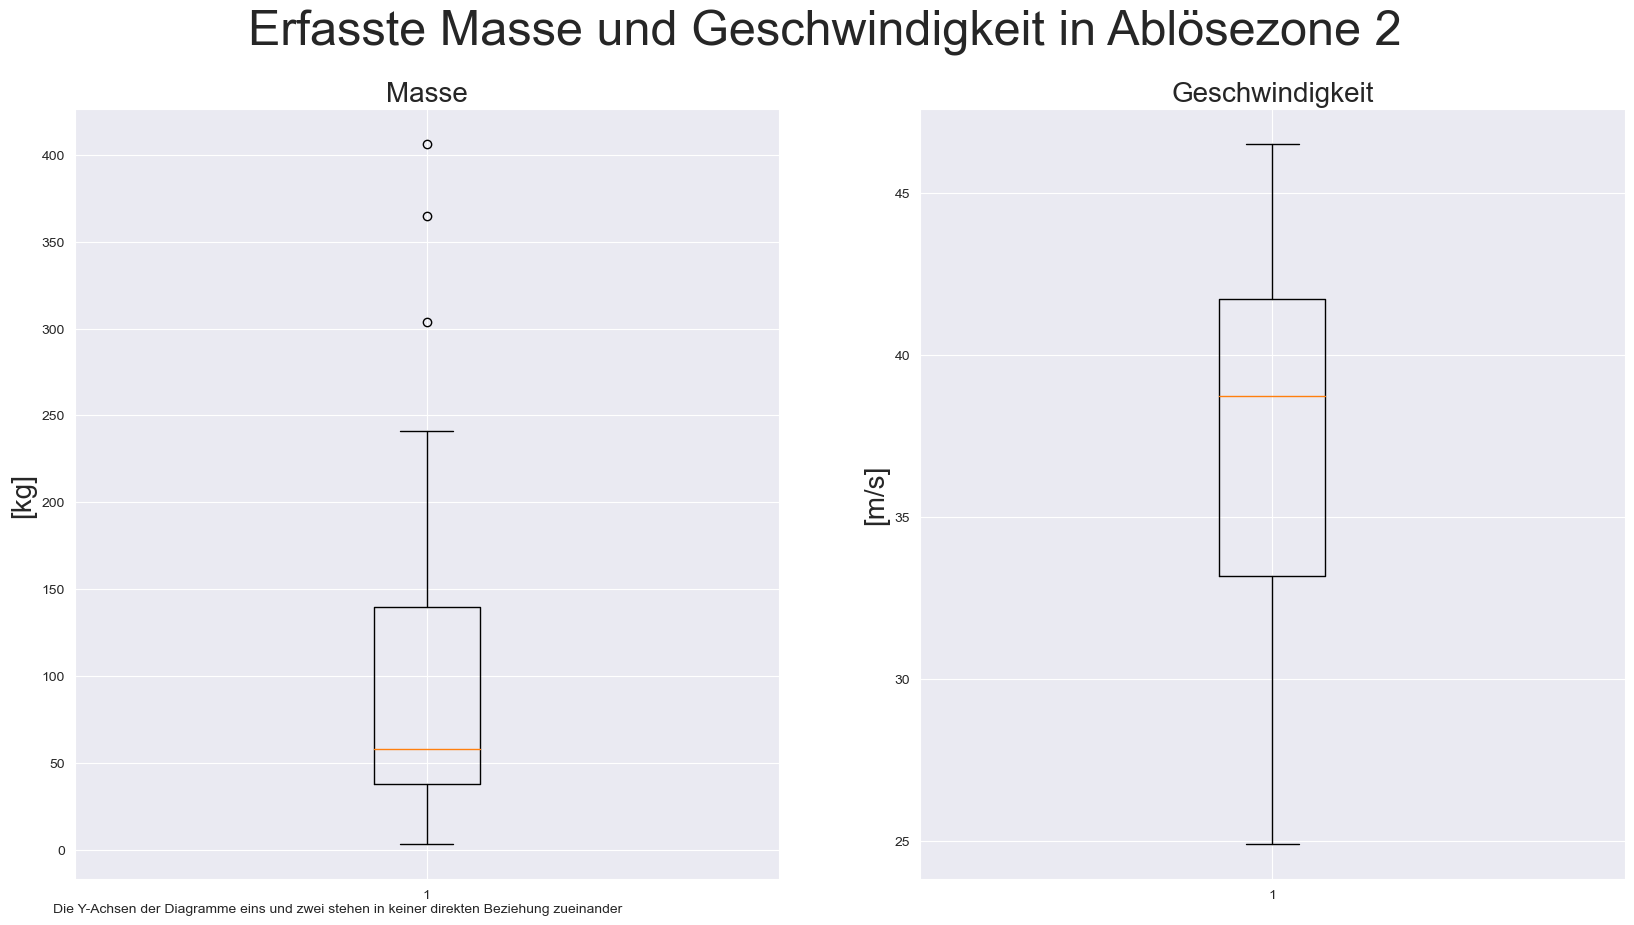

In [138]:
#boxplot of attributes "mass" and "velocity"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.boxplot(df_zone2["mass [kg]"])
ax1.set_xlabel("", fontsize = 20)
ax1.set_ylabel("[kg]", fontsize = 20)
ax1.set_title("Masse", fontsize = 20)


#subplot 1
ax2.boxplot(df_zone2["vel [m/s]"])
ax2.set_ylabel("[m/s]", fontsize = 20)
ax2.set_title("Geschwindigkeit", fontsize = 20)


#overall title
plt.suptitle("Erfasste Masse und Geschwindigkeit in Ablösezone 2", fontsize = 35)

#footnote
x = -0.03
y = -0.03
ax1.text(x, y, "Die Y-Achsen der Diagramme eins und zwei stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()


## Histogramme

Um die Verteilung der Daten weiter zu analysieren, werden Histogramme verwendet.

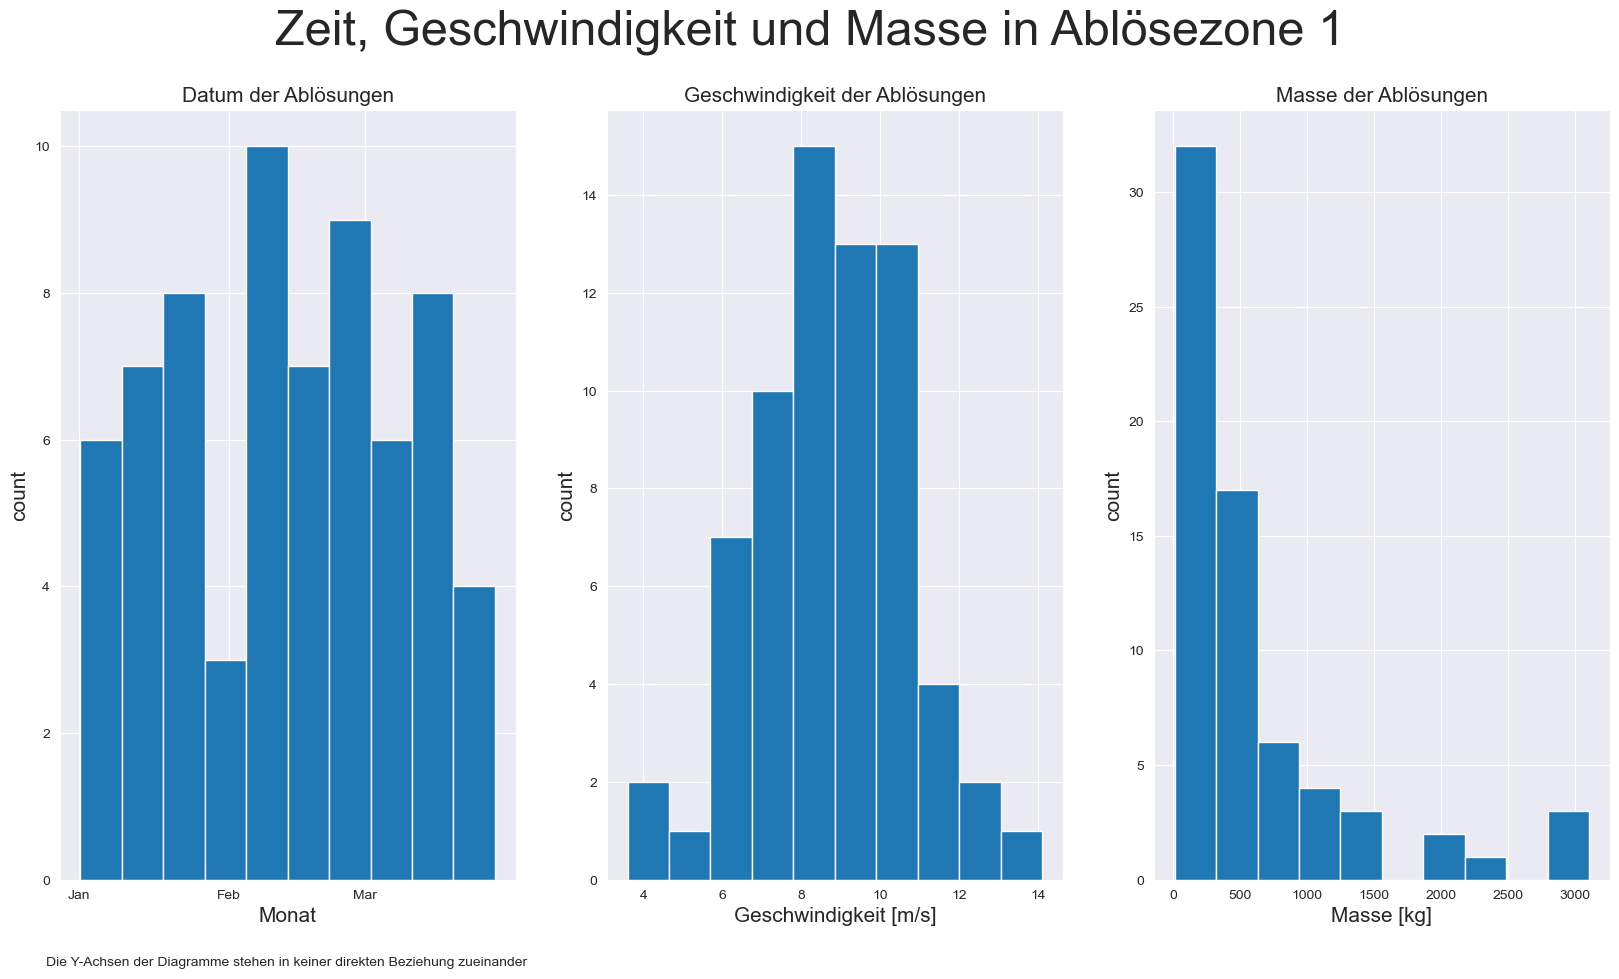

In [139]:
#Barplot of attributes "time", "mass" and "velocity"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

#subplot 1
ax1.hist(df_zone1["date"])
ax1.set_xlabel("", fontsize = 15)
ax1.set_ylabel("count", fontsize = 15)
ax1.set_xlabel("Monat", fontsize = 15)
ax1.set_title("Datum der Ablösungen", fontsize = 15)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))


#subplot 2
ax2.hist(df_zone1["vel [m/s]"])
ax2.set_ylabel("count", fontsize = 15)
ax2.set_xlabel("Geschwindigkeit [m/s]", fontsize = 15)
ax2.set_title("Geschwindigkeit der Ablösungen", fontsize = 15)

#subplot 3
ax3.hist(df_zone1["mass [kg]"])
ax3.set_ylabel("count", fontsize = 15)
ax3.set_xlabel("Masse [kg]", fontsize = 15)
ax3.set_title("Masse der Ablösungen", fontsize = 15)

#overall title
plt.suptitle("Zeit, Geschwindigkeit und Masse in Ablösezone 1", fontsize = 35)

#footnote
x = -0.03
y = -0.1
ax1.text(x, y, "Die Y-Achsen der Diagramme stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

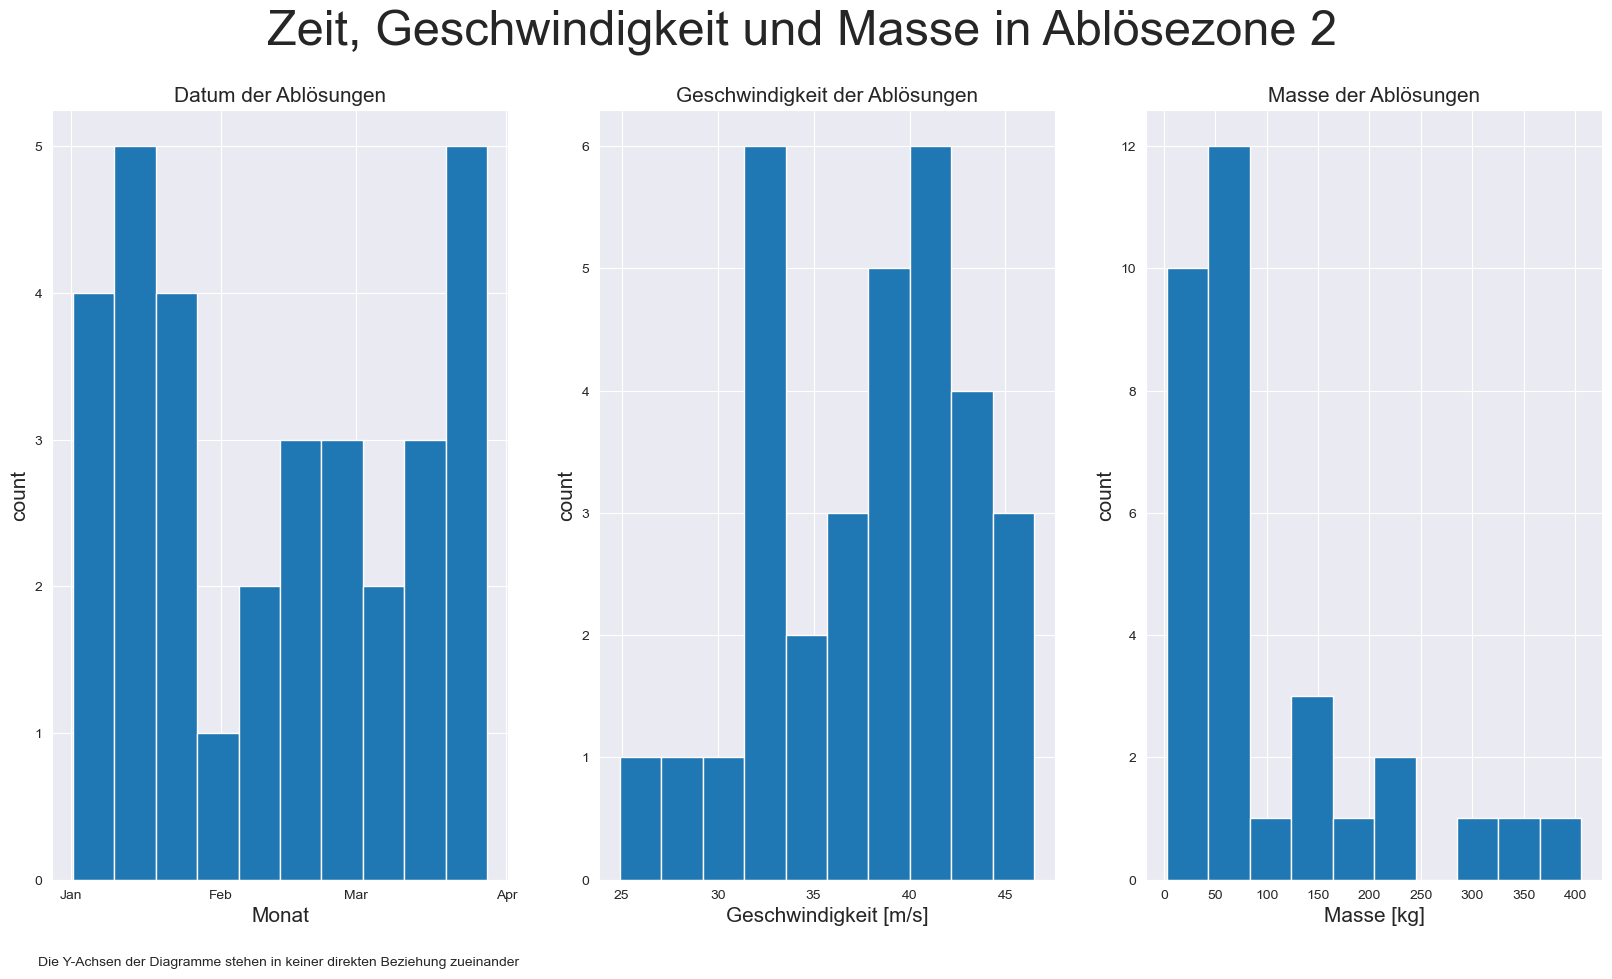

In [140]:
#Barplot of attributes "time", "mass" and "velocity"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

#subplot 1
ax1.hist(df_zone2["date"])
ax1.set_xlabel("", fontsize = 15)
ax1.set_ylabel("count", fontsize = 15)
ax1.set_xlabel("Monat", fontsize = 15)
ax1.set_title("Datum der Ablösungen", fontsize = 15)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))


#subplot 2
ax2.hist(df_zone2["vel [m/s]"])
ax2.set_ylabel("count", fontsize = 15)
ax2.set_xlabel("Geschwindigkeit [m/s]", fontsize = 15)
ax2.set_title("Geschwindigkeit der Ablösungen", fontsize = 15)

#subplot 3
ax3.hist(df_zone2["mass [kg]"])
ax3.set_ylabel("count", fontsize = 15)
ax3.set_xlabel("Masse [kg]", fontsize = 15)
ax3.set_title("Masse der Ablösungen", fontsize = 15)

#overall title
plt.suptitle("Zeit, Geschwindigkeit und Masse in Ablösezone 2", fontsize = 35)

#footnote
x = -0.03
y = -0.1
ax1.text(x, y, "Die Y-Achsen der Diagramme stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

## Zeit

Um zu erfahren, zu welcher Uhrzeit sich die meisten Steinschläge ereignen, gruppieren wir alle Ereignisse nach Stunden.

Text(0.5, 0.98, 'Zeitpunkt der Ablösungen')

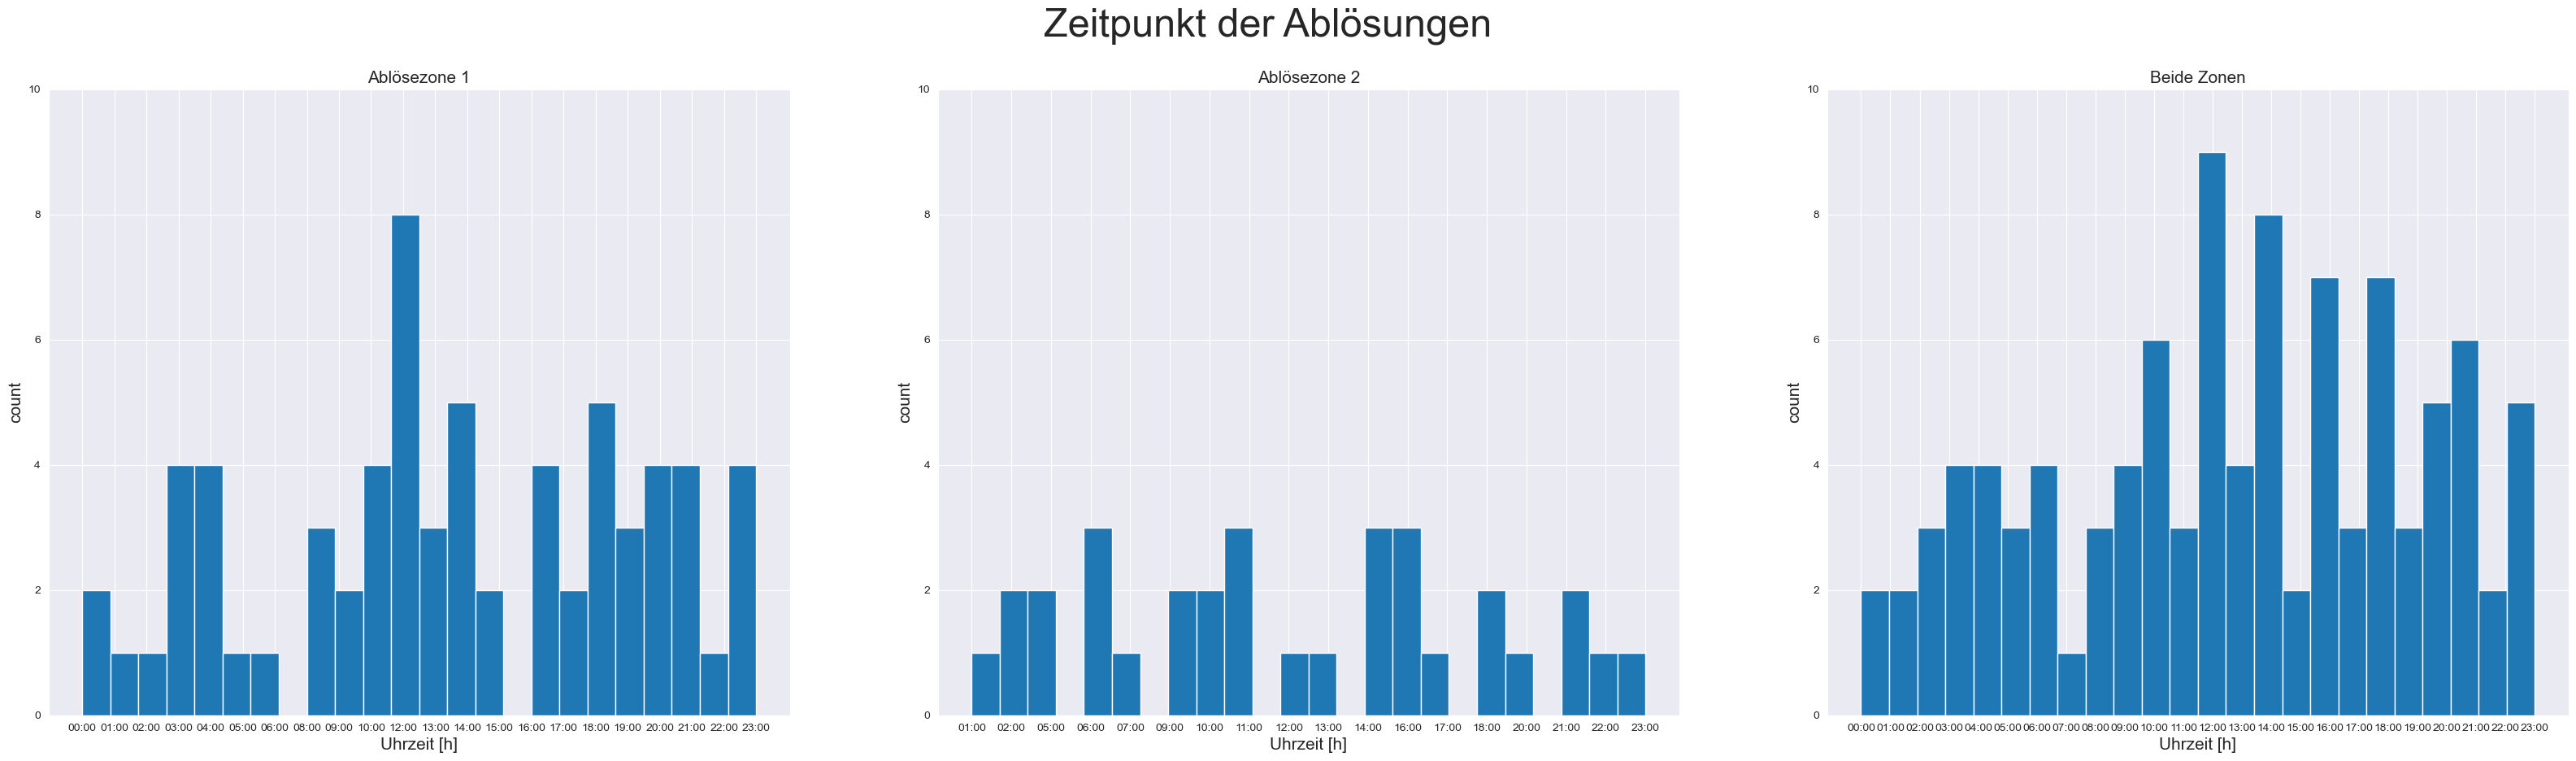

In [141]:
#sort df by time
df_zone1.sort_values(by = "time [h]", inplace = True)
df_zone2.sort_values(by = "time [h]", inplace = True)
df_zoneall.sort_values(by = "time [h]", inplace = True)

#create plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (40, 10))

#subplot 1
ax1.hist(df_zone1["time [h]"], bins=24)
ax1.set_ylabel("count", fontsize = 15)
ax1.set_xlabel("Uhrzeit [h]", fontsize = 15)
ax1.set_title("Ablösezone 1", fontsize = 15)
ax1.set_ylim(bottom=0, top=10)

#subplot 2
ax2.hist(df_zone2["time [h]"], bins=24)
ax2.set_ylabel("count", fontsize = 15)
ax2.set_xlabel("Uhrzeit [h]", fontsize = 15)
ax2.set_title("Ablösezone 2", fontsize = 15)
ax2.set_ylim(bottom=0, top=10)

#subplot 3
ax3.hist(df_zoneall["time [h]"], bins=24)
ax3.set_ylabel("count", fontsize = 15)
ax3.set_xlabel("Uhrzeit [h]", fontsize = 15)
ax3.set_title("Beide Zonen", fontsize = 15)
ax3.set_ylim(bottom=0, top=10)

#overall title
plt.suptitle("Zeitpunkt der Ablösungen", fontsize = 35)


Bei der Kategorisierung der Ereignisse in Relation zur zugehörigen Uhrzeit ist eine signifikante Konzentration von Steinschlagvorfällen um die Mittagszeit zu erkennen, gefolgt von einer nachmittäglichen Abnahme. Der Großteil der Steine fällt gegen 12 Uhr. Aufgrund der Tatsache, dass sich sowohl die Vorfälle als auch die Verkehrsdichte im Laufe des Tages wandeln, erscheint es logisch, den Verkehr in unsere Berechnungen miteinzubeziehen.

## Stündliche Verkehrsdichte

Da die Verkehrsdichte in der Region Schiers nicht stündlich gemessen wird, müssen wir uns auf Schweizer Durchschnittsdaten berufen, welche durch das BFS erhoben wurden.
Die Aktuellsten Daten Stammen aus dem Bericht "Verkehrsverhalten der Bevölkerung" aus dem Jahr 2015

In [142]:
# import csv


avg_traffic = pd.read_csv("/Users/christianheeb/Documents/PyCharm/cwm1_challenge/00_data/ch_traffic_density.csv", sep = ";")

avg_traffic.head(5)


,h,%
0,0,1.507968
1,1,0.712208
2,2,0.456835
3,3,0.421837
4,4,0.980265


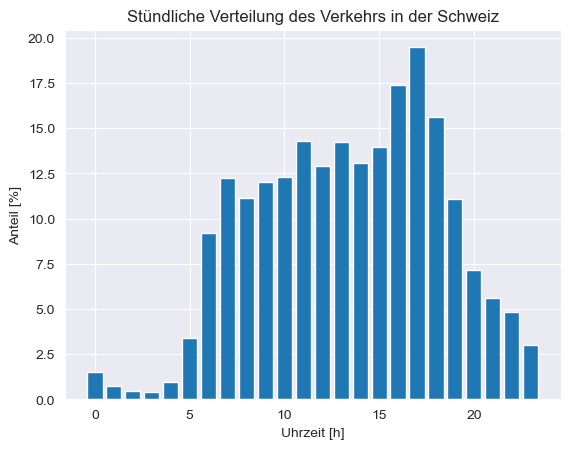

In [143]:
plt.bar(avg_traffic["h"],avg_traffic["%"])
plt.title("Stündliche Verteilung des Verkehrs in der Schweiz")
plt.xlabel("Uhrzeit [h]")
plt.ylabel("Anteil [%]")

plt.show()

Die Darstellung des mittleren Verkehrsaufkommens zeigt, dass sich der Verkehr morgens aufbaut und seinen Höhepunkt am Nachmittag erreicht.

## Streudiagramme

Zur direkten Gegenüberstellung und Analyse der betreffenden Datensätze wurden Streudiagramme erstellt.

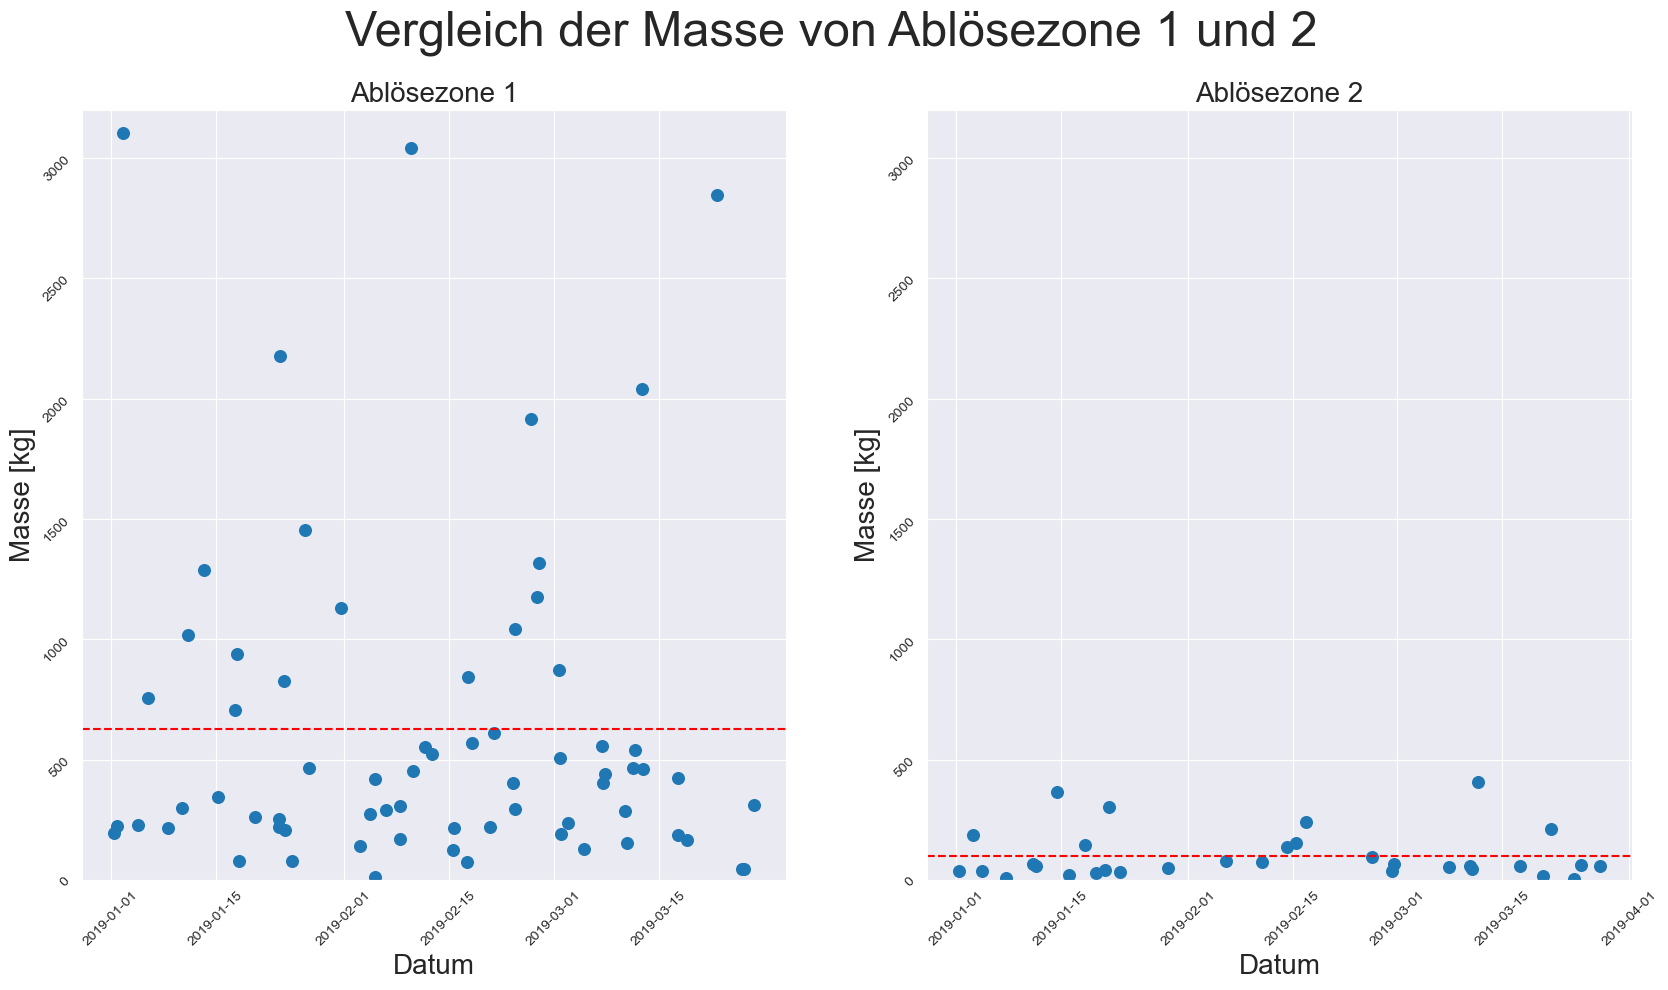

In [144]:
#compare mass of the fallen rocks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.scatter(df_zone1["date"], df_zone1["mass [kg]"], s = 70)
ax1.set_xlabel("Datum", fontsize = 20)
ax1.set_ylabel("Masse [kg]", fontsize = 20)
ax1.set_title("Ablösezone 1", fontsize = 20)
ax1.set_ylim(bottom=0, top=3200)

#subplot 1
ax2.scatter(df_zone2["date"], df_zone2["mass [kg]"], s = 70)
ax2.set_xlabel("Datum", fontsize = 20)
ax2.set_ylabel("Masse [kg]", fontsize = 20)
ax2.set_title("Ablösezone 2", fontsize = 20)
ax2.set_ylim(bottom=0, top=3200)

#overall title
plt.suptitle("Vergleich der Masse von Ablösezone 1 und 2", fontsize = 35)

#add meanline
zone1_mean = df_zone1["mass [kg]"].mean()
ax1.axhline(zone1_mean, color='r', linestyle='--')

zone2_mean = df_zone2["mass [kg]"].mean()
ax2.axhline(zone2_mean, color='r', linestyle='--')


#change angle of labels
for ax in fig.axes:
    ax.tick_params(labelrotation = 45)

plt.show()

Eine Gegenüberstellung der beiden Ablösezonen zeigt, dass Steinschläge in Zone 1 häufiger vorkommen als in Zone 2. Weiter wird ersichtlich, dass sich im Zone 1 Steine mit grösserer Masse ablösen.


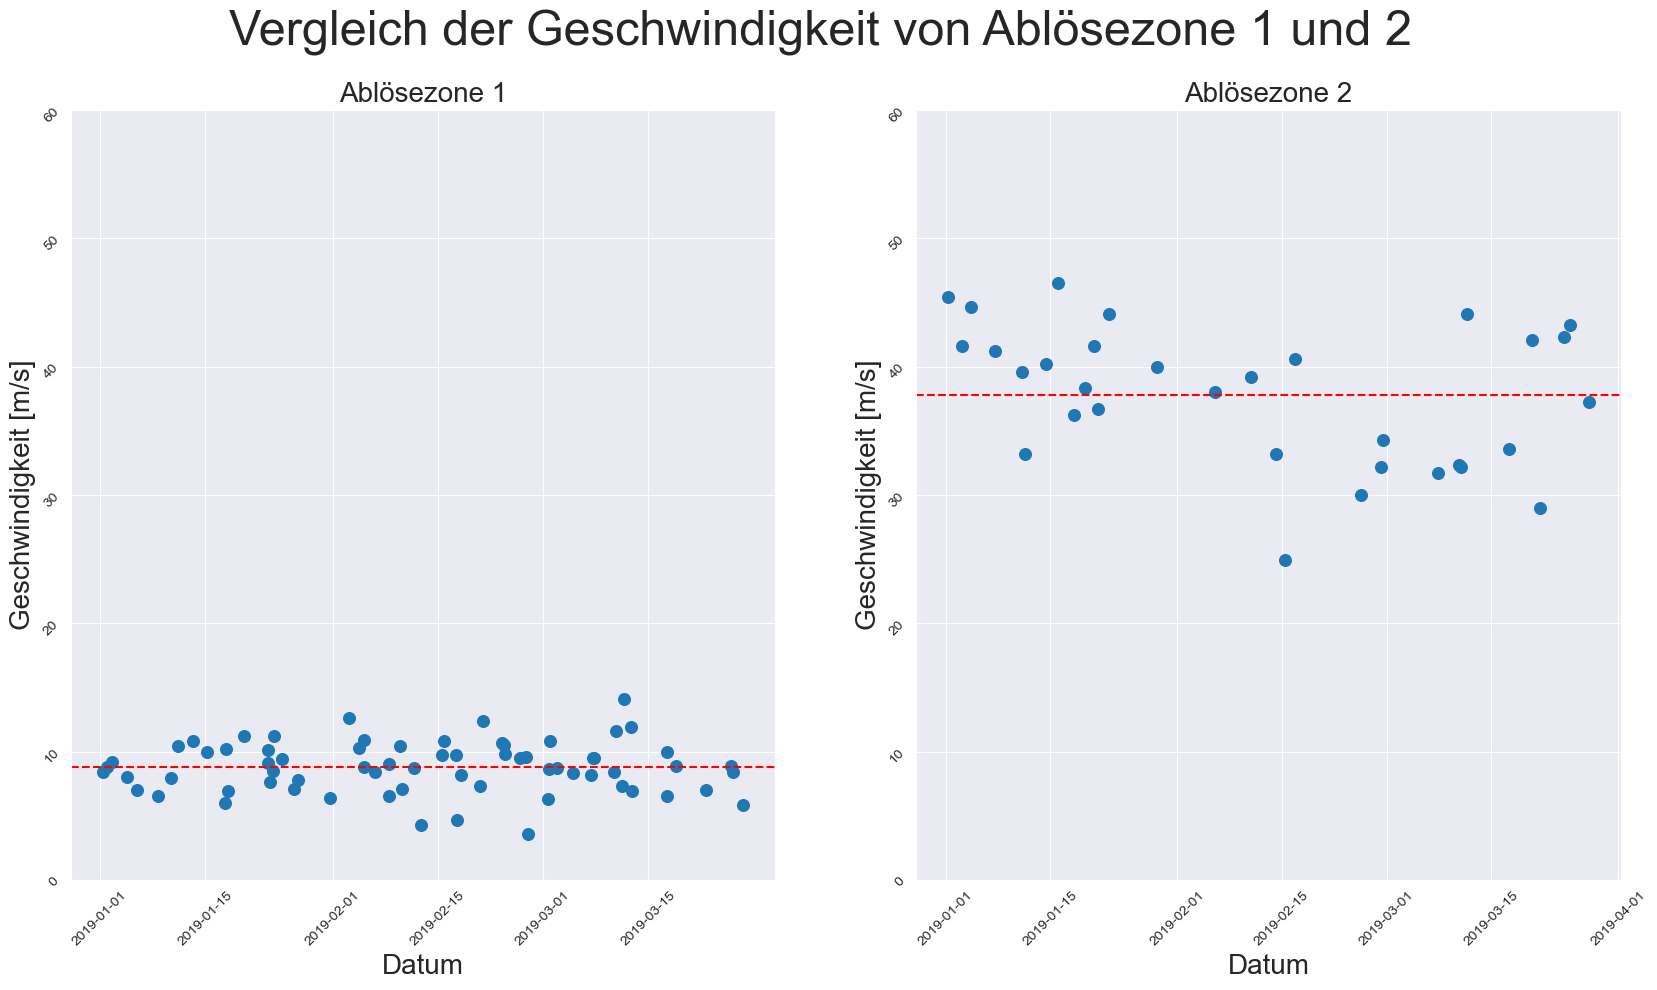

In [145]:
#compare velocity of the fallen rocks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.scatter(df_zone1["date"], df_zone1["vel [m/s]"], s = 70)
ax1.set_xlabel("Datum", fontsize = 20)
ax1.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
ax1.set_title("Ablösezone 1", fontsize = 20)
ax1.set_ylim(bottom=0, top=60)

#subplot 1
ax2.scatter(df_zone2["date"], df_zone2["vel [m/s]"], s = 70)
ax2.set_xlabel("Datum", fontsize = 20)
ax2.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
ax2.set_title("Ablösezone 2", fontsize = 20)
ax2.set_ylim(bottom=0, top=60)

#overall title
plt.suptitle("Vergleich der Geschwindigkeit von Ablösezone 1 und 2", fontsize = 35)

#add meanline
zone1_mean = df_zone1["vel [m/s]"].mean()
ax1.axhline(zone1_mean, color='r', linestyle='--')

zone2_mean = df_zone2["vel [m/s]"].mean()
ax2.axhline(zone2_mean, color='r', linestyle='--')

#change angle of labels
for ax in fig.axes:
    ax.tick_params(labelrotation = 45)

plt.show()

Steine welche sich aus Zone 1 ablösen, weisen eine geringere Geschwindigkeit auf, als jene die sich aus Zone 2 ablösen.

# Optimale Verteilungsfunktion finden

Um die optimale Wahrscheinlichkeitsverteilung für die gegebenen Daten zu ermitteln, erzeugen wir kumulative Verteilungsfunktionen (CDFs) basierend auf einer Reihe verschiedener theoretischer Verteilungen, einschließlich der Normalverteilung und der Exponentialverteilung. Die Auswahl der korrekten Verteilungsannahme ist von entscheidender Bedeutung, da diese stark in die Simulationen einfließt und folglich einen erheblichen Einfluss auf das endgültige Ergebnis hat.
Dies führen wir mithilfe des "Fitter" Pakets durch. Das Fitter-Paket verwendet die Scipy-Bibliothek, welche 80 Verteilungsfunktionen unterstützt. Der Fitter scannt alle diese Verteilungen, ruft die Anpassungsfunktion auf, ignoriert diejenigen die fehlschlagen oder ewig laufen, und gibt schliesslich eine Zusammenfassung der besten Verteilungen im Sinne der Summe der quadratischen Fehler.
Die Fitter-Bibliothek verfügt auch über eine Methode get_common_distribution(), welche 10 gängigsten Verteilungen enthält. Um die Effizienz zu erhöhen und den Zeitaufwand zu minimieren, verwenden wir diese spezifische Methode.

In [146]:
def dist_fitter(data):
    #with get_common_distributions to get the 10 most common distributions
    distributions = get_common_distributions()

    #distribute values evenly on X-axis
    x = np.linspace(min(data), max(data), 1_000)

    #create cumulative distribution function of the chosen distributions
    for distribution in distributions:
        param = eval("stats." + distribution + ".fit(data)")
        sample = eval("stats." + distribution + ".cdf(x, *param)")
        plt.plot(x, sample)

    #plot empirical cumulative distribution function (ecdf)
    plt.hist(data, cumulative = True, density = True, bins=200)
    plt.xlim([data.min(), data.max()])
    plt.xlabel(data.head().name)
    plt.legend(distributions, loc = "upper left")


## Beurteilung der Ablösezone 1

### Geschwindigkeit

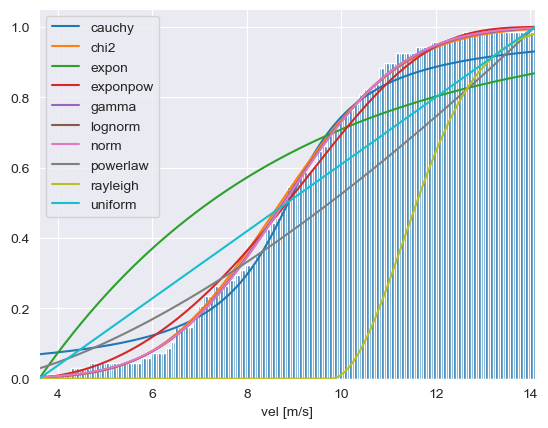

In [147]:
dist_fitter(df_zone1["vel [m/s]"])

Im Zusammenhang mit der Geschwindigkeit ist, ähnlich wie bei der Masse, der obere Bereich von größerer Bedeutung. Der Grund dafür ist, dass Steine mit höherer Geschwindigkeit eine größere Aufprallenergie aufweisen, die potenziell dazu beitragen kann, das Netz zu durchbrechen.
 Trotz dieser Überlegungen zeigt das Diagramm eine visuelle Übereinstimmung mit einer Normalverteilung, was für die Auswahl dieser Verteilung spricht.

### Masse

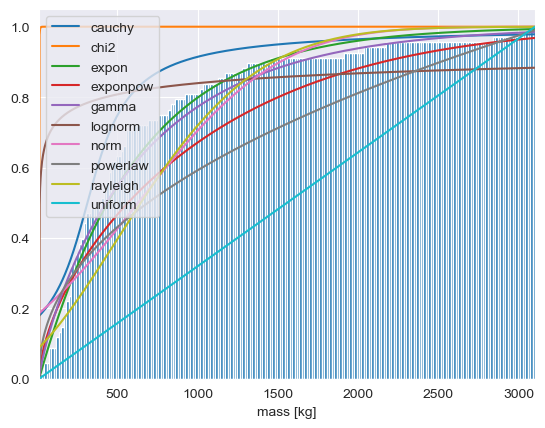

In [148]:
dist_fitter(df_zone1["mass [kg]"])

Die Wahl zwischen der Exponentialverteilung und der Gammaverteilung hängt stark von dem Kontext ab, in dem sie angewendet werden. Im vorliegenden Fall erscheint die Gammaverteilung jedoch als passendere Option. Dieser Schluss ist primär auf die Bedeutung schwerer Steine in unserem Modell zurückzuführen, welche ein erhöhtes Potential für Durchbrüche aufweisen. Die Gammaverteilung zeigt eine bessere Übereinstimmung mit höheren Werten, was eine höhere Zuverlässigkeit für unsere Bedürfnisse impliziert.

### Zeitdifferenz

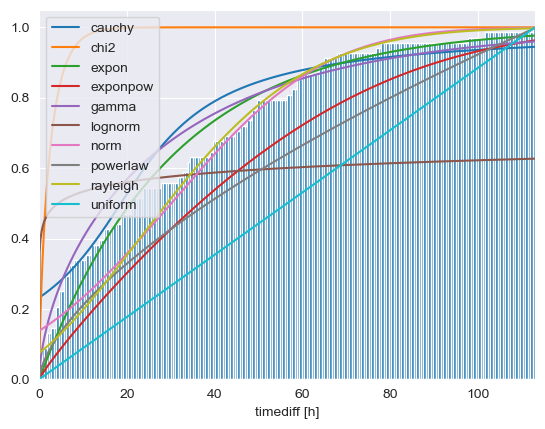

In [149]:
dist_fitter(df_zone1["timediff [h]"])

Im Unterschied zu Massen- und Geschwindigkeitsparametern ist im Kontext der Zeitabstände der untere Bereich von besonderem Interesse. Dies ist auf die natürliche Begebenheit zurückzuführen, dass bei geringeren Zeitabständen zwischen den Steinschlägen mehr Steine auf das Netz treffen können, bevor eine Leerung stattfindet.
Desshalb entscheiden wir uns hier für die Gammaverteilung


## Beurteilung der Ablösezone 2

### Geschwindigkeit

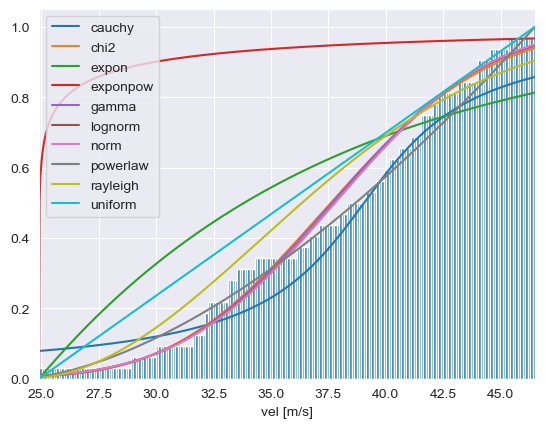

In [150]:
dist_fitter(df_zone2["vel [m/s]"])

### Masse

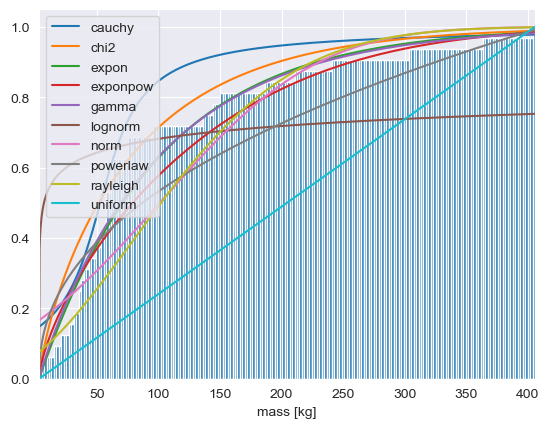

In [151]:
dist_fitter(df_zone2["mass [kg]"])

Analog zu den Argumenten, die in Ablösezone 1 vorgebracht wurden, zeigt auch hier die Gammaverteilung eine optimale Passform für die vorliegenden Daten.

### Zeitdifferenz

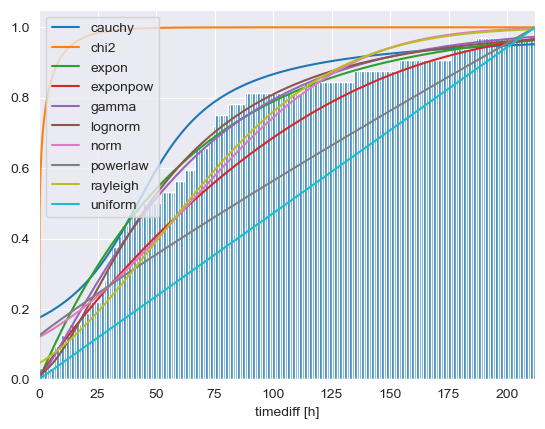

In [152]:
dist_fitter(df_zone2["timediff [h]"])

## Übersicht der ausgewählten Verteilungen in Zone 1 und 2

| Attribut              | Verteilung              |
|:----------------------|:------------------------|
| df_zone1 vel [m/s]    | Normalverteilung        |
| df_zone1 mass [kg]    | Gammaverteilung         |
| df_zone1 timediff [h] | Gammaverteilung         |
| df_zone2 vel [m/s]    | Normalverteilung        |
| df_zone2 mass [kg]    | Gammaverteilung         |
| df_zone2 timediff [h] | Exponentialverteilung   |


# Simulation der Daten

In unserem aktuellen Szenario verwenden wir die Monte-Carlo-Simulation, um unsere Daten zu simulieren. Dies basiert auf den zuvor festgelegten Verteilungsannahmen. Die Hauptphase in einer Monte-Carlo-Simulation ist die Generierung von zufälligen Zahlen, die der gewählten Wahrscheinlichkeitsverteilung folgen.
Dazu verwenden wir die Funktion scipy.stats

In [153]:
#numer of Simulations
number_of_simulations = 10_000_000

## Simulation der Zone 1

Nach der Simulation werden die Daten in den Datensatz df_zone1_sim und df_zone2_sim eingefügt

In [154]:
#create df
df_zone1_sim = pd.DataFrame()


#simulate Velocity
param = stats.norm.fit(df_zone1["vel [m/s]"])
zone1_vel = stats.norm.rvs(*param, size = number_of_simulations)
#insert values
df_zone1_sim.insert(0, "vel [m/s]", zone1_vel)

#simulate Mass
param = stats.gamma.fit(df_zone1["mass [kg]"])
zone1_mass = stats.gamma.rvs(*param, size = number_of_simulations)
#insert values
df_zone1_sim.insert(1, "mass [kg]", zone1_mass)

#simulate time difference
param = stats.gamma.fit(df_zone1["timediff [h]"])
zone1_timediff = stats.gamma.rvs(*param, size = number_of_simulations)
#insert values
df_zone1_sim.insert(2, "timediff [h]", zone1_timediff)
#round timediff values
df_zone1_sim["timediff [h]"] = zone1_timediff.round(1)
df_zone1_sim["timediff [h]"][0] = 0

#calculate and insert energy in kj for generated values
df_zone1_sim.insert(3, "KE [kJ]", "")
df_zone1_sim["KE [kJ]"] = 0.5 * df_zone1_sim["mass [kg]"] * df_zone1_sim["vel [m/s]"] ** 2 / 1000


In [155]:
df_zone1_sim.head(5)

,vel [m/s],mass [kg],timediff [h],KE [kJ]
0,12.786558,1303.199381,0.0,106.533992
1,9.940933,108.950149,0.2,5.383344
2,11.513672,1369.898414,34.6,90.800047
3,11.262488,137.968341,47.8,8.750203
4,8.139022,597.398952,16.0,19.786953


## Simulation der Zone 2

In [156]:
#create df
df_zone2_sim = pd.DataFrame()


#simulate Velocity
param = stats.norm.fit(df_zone2["vel [m/s]"])
zone2_vel = stats.norm.rvs(*param, size = number_of_simulations)
#insert values
df_zone2_sim.insert(0, "vel [m/s]", zone2_vel)

#simulate Mass
param = stats.gamma.fit(df_zone2["mass [kg]"])
zone2_mass = stats.gamma.rvs(*param, size = number_of_simulations)
#insert values
df_zone2_sim.insert(1, "mass [kg]", zone2_mass)

#simulate time difference
param = stats.expon.fit(df_zone2["timediff [h]"])
zone2_timediff = stats.expon.rvs(*param, size = number_of_simulations)
#insert values
df_zone2_sim.insert(2, "timediff [h]", zone2_timediff)
#round timediff values
df_zone2_sim["timediff [h]"] = zone2_timediff.round(1)
df_zone2_sim["timediff [h]"][0] = 0

#calculate and insert energy in kj for generated values
df_zone2_sim.insert(3, "KE [kJ]", "")
df_zone2_sim["KE [kJ]"] = 0.5 * df_zone2_sim["mass [kg]"] * df_zone2_sim["vel [m/s]"] ** 2 / 1000


In [157]:
df_zone2_sim.head(5)

,vel [m/s],mass [kg],timediff [h],KE [kJ]
0,41.291908,93.064479,0.0,79.338475
1,44.290749,156.830273,39.2,153.824655
2,43.434071,44.591060,38.5,42.060930
3,46.420847,168.064586,18.4,181.080768
4,37.683135,207.082908,93.6,147.030797


Für weitere Berechnungen wird der kumulierte Zeitabstand berechnet und zu den Datensätzen df_zone1_sim und df_zone2_sim hinzugefügt

In [158]:
#calculate cumulative timediff
df_zone1_sim.insert(4, "cum timediff [h]", "")
df_zone1_sim["cum timediff [h]"] = np.cumsum(df_zone1_sim["timediff [h]"])
df_zone1_sim.head(5)

#calculate cumulative timediff
df_zone2_sim.insert(4, "cum timediff [h]", "")
df_zone2_sim["cum timediff [h]"] = np.cumsum(df_zone2_sim["timediff [h]"])
df_zone2_sim.head(5)

,vel [m/s],mass [kg],timediff [h],KE [kJ],cum timediff [h]
0,41.291908,93.064479,0.0,79.338475,0.0
1,44.290749,156.830273,39.2,153.824655,39.2
2,43.434071,44.591060,38.5,42.060930,77.7
3,46.420847,168.064586,18.4,181.080768,96.1
4,37.683135,207.082908,93.6,147.030797,189.7


288835614.39955497
642661126.8001745
106335.24442919286


Zusammenfügend er beiden Datensätze df_zone1_sim und df_zone2_sim zu df_zoneall_sim

In [160]:
df_zoneall_sim = pd.concat([df_zone1_sim, df_zone2_sim], ignore_index = True)

#sort df_zoneall_sim by time
df_zoneall_sim.sort_values(by = "cum timediff [h]", inplace = True)

#renew index of combined dfs
df_zoneall_sim = df_zoneall_sim.reset_index()
df_zoneall_sim = df_zoneall_sim.drop(['index'], axis=1)

#rearrange columns
df_zoneall_sim = df_zoneall_sim[["vel [m/s]", "mass [kg]", "KE [kJ]", "timediff [h]", "cum timediff [h]"]]


df_zoneall_sim.head(10)


,vel [m/s],mass [kg],KE [kJ],timediff [h],cum timediff [h]
0,12.786558,1303.199381,106.533992,0.0,0.0
1,41.291908,93.064479,79.338475,0.0,0.0
2,9.940933,108.950149,5.383344,0.2,0.2
3,11.513672,1369.898414,90.800047,34.6,34.8
4,44.290749,156.830273,153.824655,39.2,39.2
5,43.434071,44.591060,42.060930,38.5,77.7
6,11.262488,137.968341,8.750203,47.8,82.6
7,46.420847,168.064586,181.080768,18.4,96.1
8,8.139022,597.398952,19.786953,16.0,98.6
9,8.155595,230.163190,7.654506,0.4,99.0


## Anzahl simulierte Jahre

In [176]:
#calculate simulated years
simulated_years = (sum(df_zoneall_sim["timediff [h]"]) / 8760)

print("Anzahl simulierte Jahre: {}".format(simulated_years))


Anzahl simulierte Jahre: 106335.24442938653


# Bedingung für das Zerreissen des Sicherheitsnetzes

Ausgangslage:
Es wurde geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1000 kJ sicher sind. Falls bereits ein Stein mit über 2000kg in den Sicherheitsnetzen liegt, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 500 kJ. Steine in den Sicherheitsnetze werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

In [162]:
#Function to determine when the net breaks
def net_break(mass, KE, cumulative_KE):
    #Safety net breaks
    if KE >= 1000:
        return True

    #Breakthrough when stones with total weight of 200kg are already in the net and the impact energy is more than 500kj
    elif KE >= 500 and cumulative_KE >= 2000:
        return True

    #no Breakthrough
    else:
        return False


In [184]:
cum_timediff = 0
cumulative_mass = 0
breakthroughs = 0

for row in df_zoneall_sim.itertuples():
    mass = row[2]
    KE = row[3]
    timediff = row[4]

    #count the number of breakthroughs if the net breaks
    if net_break(mass, KE, cumulative_mass):
        breakthroughs += 1

    #timediff > 24h -> Safety net gets emptied and counter is set back
    if timediff >= 24:
        cum_timediff = 0
        cumulative_mass = 0

    #Sum up time intervals and mass
    else:
        cum_timediff += timediff
        cumulative_mass += mass


In [185]:
#print breakthroughs per year
print("Anzahl Durchbrüche: {}".format(breakthroughs))

# Durchbrüche pro Jahr
breakthroughs_per_year = breakthroughs / simulated_years
print(breakthroughs_per_year)

Anzahl Durchbrüche: 1639
0.015413516081099544


## Auto wird von Stein getroffen

Ausgangslage:
Das tägliche Verkehrsaufkommen beträgt 1200 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h. Somit passieren pro Stunde 50 Fahrzeuge die Strasse.

Bezüglich der durchschnittlichen Anzahl Personen in einem Fahrzeug müssen wir uns auf Schweizer den Schweizer Durchschnitt berufen, welcher durch das BFS erhoben wurden. Diese ist gemäss dem Bericht "Verkehrsverhalten der Bevölkerung" aus dem Jahr 2015, 1.56 Personen pro Fahrzeug.

Gemäss einer Analyse des ADAC waren die Autos im Jahr 2020 im Durchschnitt 4,60 Meter lang. Da sich aber der Fahrer und Beifahrer nur in einem kleinen Teil des Autos aufhalten, Berechnen wir die "kritische" länge eines Autos mit 2.0 Meter.



Erreicht ein Stein die Strasse, können mehrere Szenarien auftreten:
1. Stein liegt auf der Strasse und wird von den Verkehrsteilnehmer bemerkt
2. Stein liegt auf der Strasse und ein Auto fährt in den Stein
3. Stein trifft das Auto

Bei Szenario 1 werden keine Personen verletzt. Hingegen bei Szenario 2 kann es zu möglichen Verletzungen oder Todesfällen kommen. Da dieses Szenario aber grosse Ungewissheiten aufweist, konzentrieren wir uns auf Szenario 3.

Daraus berechnen sich die Gefahr für eine Tödlichen Treffer wie folgt:


In [191]:
#set Variables
car_length = 2
people_in_car = 1.56
car_speed = 60
distance_per_second = car_speed / 3.6
number_of_cars_seconds = 1200 / 24 / 60 / 60

#Probability that the car will drive into the rock
fatal_hit = car_length / distance_per_second * number_of_cars_seconds


#Death probability per year
fatal_hit_per_year = fatal_hit * people_in_car * breakthroughs_per_year

print("Die Todeswahrscheinlichkeit durch Steinschlag auf der Kantonstrasse von Schiers Beträgt: {}".format(f"{fatal_hit_per_year:.9f}"))

Die Todeswahrscheinlichkeit durch Steinschlag auf der Kantonstrasse von Schiers Beträgt: 0.000040075


# Fazit

# Quellen

Cramer, E., & Kamps, U. (2017). Grundlagen der Wahrscheinlichkeitsrechnung und Statistik: Eine Einführung für Studierende der Informatik, der Ingenieur- und Wirtschaftswissenschaften (4., korrigierte und erweiterte Auflage). Springer Spektrum. https://doi.org/10.1007/978-3-662-54161-6

Fahrmeir, L., Heumann, C., Künstler, R., Pigeot, I., & Tutz, G. (2016). Statistik: Der Weg zur Datenanalyse (8., überarbeitete und ergänzte Auflage). Springer Spektrum. https://doi.org/10.1007/978-3-662-50372-0

Raoniar, R. (2022, September 9). Finding the Best Distribution that Fits Your Data using Python’s Fitter Library. The Researchers’ Guide. https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

Biedermann, F. (2017). Verkehrsverhalten der Bevölkerung 2015. Bundesamt für Statistik (BFS).

Christ, J. (2020, Februar 15). Datenanalyse: Autos werden nicht erst seit dem SUV-Boom größer. https://www.rnd.de/wirtschaft/datenanalyse-autos-werden-nicht-erst-seit-dem-suv-boom-grosser-6GTM66RRNJEC7EYHR3FQS7Y24Y.html
